# Web Scrapping

We can achieve web scrapping by using Requests and BeautifulSoup python libraries.

Requests library is used to send HTTP requests to websites. We will be using get() function as we are trying to get the data from the website

The format returned may vary and not as pleasing asthetically. This is where BeautifulSoul library comes in, where we can organize the data hierarchically and get the needed information from the website.

In [2]:
import requests

# Making a GET request
r = requests.get('https://www.geeksforgeeks.org/python-programming-language/')

# check status code for response received
# success code - 200
print(r)

# print content of request
print(r.content)

<Response [200]>
b'<!doctype html><html lang=en-us prefix="og: http://ogp.me/ns#"><meta charset=utf-8><meta name=keywords content="Data Structures,Algorithms,Python,Java,C,C++,JavaScript,Android Development,SQL,Data Science,Machine Learning,PHP,Web Development,System Design,Tutorial,Technical Blogs,Interview Experience,Interview Preparation,Programming,Competitive Programming,SDE Sheet,Job-a-thon,Coding Contests,GATE CSE,HTML,CSS,React,NodeJS,Placement,Aptitude,Quiz,Computer Science,Programming Examples,GeeksforGeeks Courses,Puzzles"><meta name=viewport content="width=device-width,initial-scale=1,maximum-scale=1"><link rel="shortcut icon" href=https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_favicon.png type=image/x-icon><meta name=theme-color content="#308D46"><meta name=image property="og:image" content="https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_200x200-min.png"><meta property="og:image:type" content="image/png"><meta property="og:image:width" content="200"

Request.status_code tells us the condition of the request. Code 200 represents a success.

In [4]:
print(r.url)
print(r.status_code)

https://www.geeksforgeeks.org/python-programming-language/
200


In [5]:
!pip install beautifulsoup4

In [6]:
#We initialize a BeautifulSoup object by specifying the parser type. In this case, html as our data is in html format.

from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-us" prefix="og: http://ogp.me/ns#">
 <meta charset="utf-8"/>
 <meta content="Data Structures,Algorithms,Python,Java,C,C++,JavaScript,Android Development,SQL,Data Science,Machine Learning,PHP,Web Development,System Design,Tutorial,Technical Blogs,Interview Experience,Interview Preparation,Programming,Competitive Programming,SDE Sheet,Job-a-thon,Coding Contests,GATE CSE,HTML,CSS,React,NodeJS,Placement,Aptitude,Quiz,Computer Science,Programming Examples,GeeksforGeeks Courses,Puzzles" name="keywords"/>
 <meta content="width=device-width,initial-scale=1,maximum-scale=1" name="viewport"/>
 <link href="https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_favicon.png" rel="shortcut icon" type="image/x-icon"/>
 <meta content="#308D46" name="theme-color"/>
 <meta content="https://media.geeksforgeeks.org/wp-content/cdn-uploads/gfg_200x200-min.png" name="image" property="og:image"/>
 <meta content="image/png" property="og:image:type"/>
 <meta content="200" prop

In [9]:
print(soup.title)
print(soup.title.name)
print(soup.title.parent.name)

<title>Python Programming Language - GeeksforGeeks</title>
title
html


In [10]:
s = soup.find('div', class_='entry-content')
content = s.find_all('p')
 
print(content)

[<p></p>, <p>Python is a high-level, general-purpose and a very popular programming language. Python programming language (latest Python 3) is being used in web development, Machine Learning applications, along with all cutting edge technology in Software Industry. Python Programming Language is very well suited for Beginners, also for experienced programmers with other programming languages like C++ and Java.<br/><img alt="python-programming-language Python-Tutorial" class="aligncenter size-full wp-image-430076" src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20200711122552/Python-Programming-Language.png"/></p>, <p>This specially designed Python tutorial will help you learn Python Programming Language in most efficient way, with the topics from basics to advanced (like Web-scraping, Django, Deep-Learning, etc.) with examples.</p>, <p><span id="more-136942"></span></p>, <p>Below are some facts about Python Programming Language:</p>, <p><strong><a href="https://www.geeksfor

Getting our data from a class

In [13]:
s = soup.find('div', id='main')
leftbar = s.find('ul', class_='leftBarList')
content = leftbar.find_all('li')
print(content)

[<li><a href="https://write.geeksforgeeks.org/posts-new/?ref=GLBWA">Write Articles</a></li>, <li><a href="https://write.geeksforgeeks.org/pick-article/?ref=GLBPT">Pick Topics to write</a></li>, <li><a href="https://write.geeksforgeeks.org/how-to-write/?ref=GLBHW">Guidelines to Write</a></li>, <li><a href="https://www.geeksforgeeks.org/get-technical-content-writing-internship-geeksforgeeks-org/">Get Technical Writing Internship</a></li>, <li><a href="https://write.geeksforgeeks.org/posts-new?interview-experience/?ref=GLBIE">Write an Interview Experience</a></li>, <li class="currentpage"><a href="https://www.geeksforgeeks.org/python-programming-language/?ref=lbp">Python Programming Language</a></li>, <li><a href="https://www.geeksforgeeks.org/introduction-to-python/?ref=lbp">Introduction To PYTHON</a></li>, <li><a href="https://www.geeksforgeeks.org/python-language-advantages-applications/?ref=lbp">Python Language advantages and applications</a></li>, <li><a href="https://www.geeksforgee

In [14]:
#Extracting text from tags <p></p>

s = soup.find('div', class_='entry-content')
 
lines = s.find_all('p')
 
for line in lines:
    print(line.text)


Python is a high-level, general-purpose and a very popular programming language. Python programming language (latest Python 3) is being used in web development, Machine Learning applications, along with all cutting edge technology in Software Industry. Python Programming Language is very well suited for Beginners, also for experienced programmers with other programming languages like C++ and Java.
This specially designed Python tutorial will help you learn Python Programming Language in most efficient way, with the topics from basics to advanced (like Web-scraping, Django, Deep-Learning, etc.) with examples.

Below are some facts about Python Programming Language:
Recent Articles on Python !Python Programming ExamplesPython Output & Multiple Choice Questions 
Basics, Input/Output, Data Types, Variables, Operators, Control Flow, Functions, Object Oriented Concepts, Exception Handling, Python Collections, Django Framework, Data Analysis, Numpy, Pandas, Machine Learning with Python, Pyth

In [15]:
#Removing the tags from the content of the leftbar


# Finding by id
s = soup.find('div', id= 'main')

# Getting the leftbar
leftbar = s.find('ul', class_='leftBarList')

# All the li under the above ul
lines = leftbar.find_all('li')

for line in lines:
	print(line.text)


Write Articles
Pick Topics to write
Guidelines to Write
Get Technical Writing Internship
Write an Interview Experience
Python Programming Language
Introduction To PYTHON
Python Language advantages and applications
Download and Install Python 3 Latest Version
Python 3 basics
Python Keywords
Namespaces and Scope in Python
Statement, Indentation and Comment in Python
How to assign values to variables in Python and other languages
Taking input in Python
Taking input from console in Python
Taking multiple inputs from user in Python
Python | Output using print() function
How to print without newline in Python?
Python end parameter in print()
Python | sep parameter in print()
Python | Output Formatting
Python Operators
Ternary Operator in Python
Division Operators in Python
Operator Overloading in Python
Any All in Python
Operator Functions in Python | Set 1
Operator Functions in Python | Set 2
Difference between == and is operator in Python
Python Membership and Identity Operators
Python | S

We have just been extracting text. Lets see how we can extract links!

We get all <a> anchor tags and call .get('href') which will return the link associated with the hypertext

In [16]:
# find all the anchor tags with "href"
for link in soup.find_all('a'):
    print(link.get('href'))

#main
https://www.geeksforgeeks.org/
https://practice.geeksforgeeks.org/courses/devops-live?utm_source=gfg&utm_medium=Submenu&utm_campaign=courses-submenu
https://practice.geeksforgeeks.org/courses/geeks-classes-live?utm_source=gfg&utm_medium=Submenu&utm_campaign=courses-submenu
https://practice.geeksforgeeks.org/courses/system-design-live?utm_source=gfg&utm_medium=Submenu&utm_campaign=courses-submenu
https://practice.geeksforgeeks.org/courses/java-backend-live?utm_source=gfg&utm_medium=Submenu&utm_campaign=courses-submenu
https://practice.geeksforgeeks.org/courses/full-stack-node?utm_source=gfg&utm_medium=Submenu&utm_campaign=courses-submenu
https://practice.geeksforgeeks.org/courses/data-science-live?utm_source=geeksforgeeks&utm_medium=submenu_22&utm_campaign=courses-submenu
https://practice.geeksforgeeks.org/courses/dsa-self-paced?utm_source=gfg&utm_medium=Submenu&utm_campaign=courses-submenu
https://practice.geeksforgeeks.org/courses/Data-Structures-With-Python?utm_source=gfg&utm_m

Extracting Images

In [21]:
images = soup.select("img")
images_list = []

for img in images:
    im = img.get('src')
    alt = img.get('alt')
    images_list.append({"src": im, "alt": alt})
    
for image in images_list:
    print(image)

{'src': 'https://media.geeksforgeeks.org/gfg-gg-logo.svg', 'alt': 'geeksforgeeks'}
{'src': 'https://media.geeksforgeeks.org/wp-content/cdn-uploads/20200711122552/Python-Programming-Language.png', 'alt': 'python-programming-language Python-Tutorial'}
{'src': 'https://media.geeksforgeeks.org/wp-content/post-ads-banner/2023-02-02-19-03-14-Cip-gif.gif', 'alt': None}
{'src': 'https://media.geeksforgeeks.org/wp-content/post-ads-banner/2023-01-05-13-23-50-cds.gif', 'alt': None}
{'src': 'https://media.geeksforgeeks.org/wp-content/post-ads-banner/2023-01-02-16-50-48-system-design.gif', 'alt': None}
{'src': '', 'alt': 'Lightbox'}


Now lets see how to scrape multiple pages of a website

We shall see how to extract data from multiple webpages:
      
      -Same website
      -Different website URLs
    

In [43]:
#Same website
from bs4 import BeautifulSoup

url = 'https://www.cdn.geeksforgeeks.org/page/'

for page in range(2,10):
    
    req = requests.get(url + str(page) + "/")
    soup = BeautifulSoup(req.text, 'html.parser')
    sp = soup.find_all('div', attrs = {'class', 'head'})
    
    for j in range(4, 19):
        if page>1:
            print(f"{(j-3)+page*15}" + " " + sp[j].text)
        else:
            print(f"{j-3}" + " " +sp[j].text)
    

31 How Cache Memory Works
32 5 Things to Never Say in an Interview
33 Java Program to Check Duck Number
34 Tester vs Developer: Roles & Responsibilties
35 On Campus vs Off Campus: What is the difference?
36 Titanic Survival Prediction using Tensorflow
37 
How to update layouts based on viewport dimesion using useViewport hook ?
            

38 
Consumer’s Equilibrium in case of Single and Two Commodity
            

39 
Difference between registering a component locally and globally
            

40 
How to use jQuery library and call functions from it ?
            

41 
Explain AngularJS Scope Life-Cycle
            

42 
What’s the difference between an Angular Component and Module?
            

43 
How can we test the AJAX code ?
            

44 
Fastest way to dulicate an array in JavaScript
            

45 
How to avoid receiving postMessages from attackers ?
            

46 How Cache Memory Works
47 5 Things to Never Say in an Interview
48 Java Program to Check Duck Number


In [45]:
#Looping through a list of different URLs
URL = ['https://www.geeksforgeeks.org','https://www.geeksforgeeks.org/page/10/']

for url in range(0,2):
    req = requests.get(URL[url])
    soup = BeautifulSoup(req.text, 'html.parser')
    sp = soup.find_all('div', attrs = {'main', 'head'})
    
    for i in range(4, 19):
        if(url+1 > 1):
            print(f"P{(j-3)+page*15}" +  sp[i].text)
        else:
            print(f"{j-3}" + sp[i].text)

IndexError: list index out of range

Saving the data to CSV

We will create a list of dictionaries with key value pairs that we want to save in the csv file 

In [52]:
#A new example of webscrapping

import requests
from bs4 import BeautifulSoup as bs
import csv

URL = 'https://www.geeksforgeeks.org/page/2'
req = requests.get(URL)

soup = bs(req.text, 'html.parser')

titles = soup.find_all('div', attrs={'class', 'head'})
titles_list = []

count = 1
for title in titles:
	d = {}
	d['Title Number'] = f'Title {count}'
	d['Title Name'] = title.text
	count += 1
	titles_list.append(d)

filename = 'titles.csv'
with open(filename, 'w', newline='') as f:
	w = csv.DictWriter(f,['Title Number','Title Name'])
	w.writeheader()
	
	w.writerows(titles_list)

File is exported to csv as shown below.

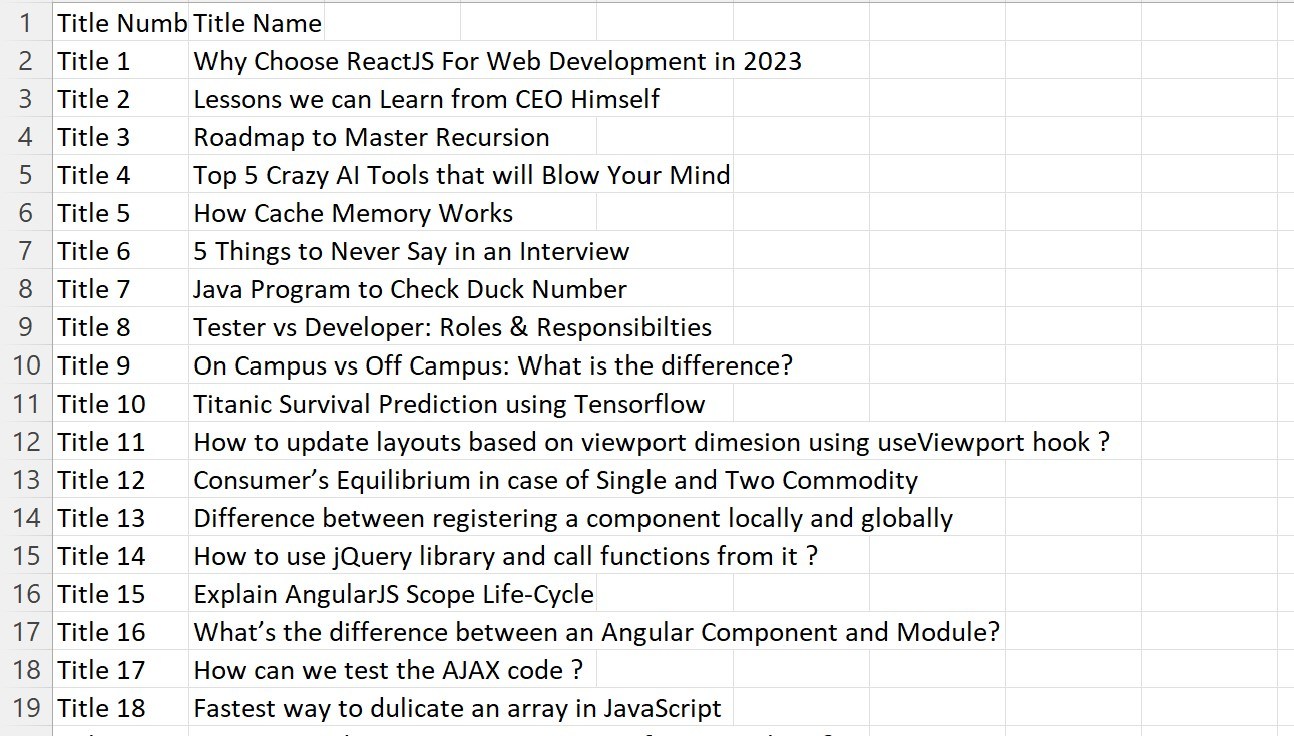